In [31]:
#https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant

In [32]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA #(principal composante Analyse)
from sklearn.linear_model import Ridge, Lasso,LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score , LeaveOneOut, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [33]:
#import mes données
df= pd.read_csv('../data/MultipleLinearRegressionDataset.csv')  

In [34]:
#Connaitre les dimensions de notre jeu de données
df.shape

(9568, 5)

In [35]:
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [36]:
#Prévisualiser mes données
display(df)

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


In [37]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [38]:
#Obtenir des informations sur les types de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [39]:
# Détection les doublons
doublons = df[df.duplicated()]
doublons

,AT,V,AP,RH,PE
1696,7.24,41.17,1020.35,80.56,486.76
1979,29.45,75.60,1018.12,50.68,437.31
2378,12.27,41.17,1019.39,52.18,473.84
3696,24.79,75.60,1017.07,68.23,440.05
5020,12.00,41.17,1019.48,58.71,474.40
5150,12.27,41.17,1019.41,58.10,475.13
5548,6.86,41.17,1020.12,79.14,490.23
5578,7.64,41.17,1020.01,75.14,488.53
6129,29.51,75.60,1017.92,50.61,431.18
6251,8.07,41.17,1019.40,86.43,484.54


In [40]:
#Supprimons les 41 lignes doublons
df.drop_duplicates(inplace=True)
#reinitialiser les index 
df.reset_index(drop=True, inplace=True)

In [41]:
# Nombre total de valeurs manquantes (Null) dans l'ensemble de la DataFrame:
nbr_val_null = df.isna().sum().sum()
print("Le nombre total de valeurs manquantes est :", nbr_val_null)

Le nombre total de valeurs manquantes est : 0


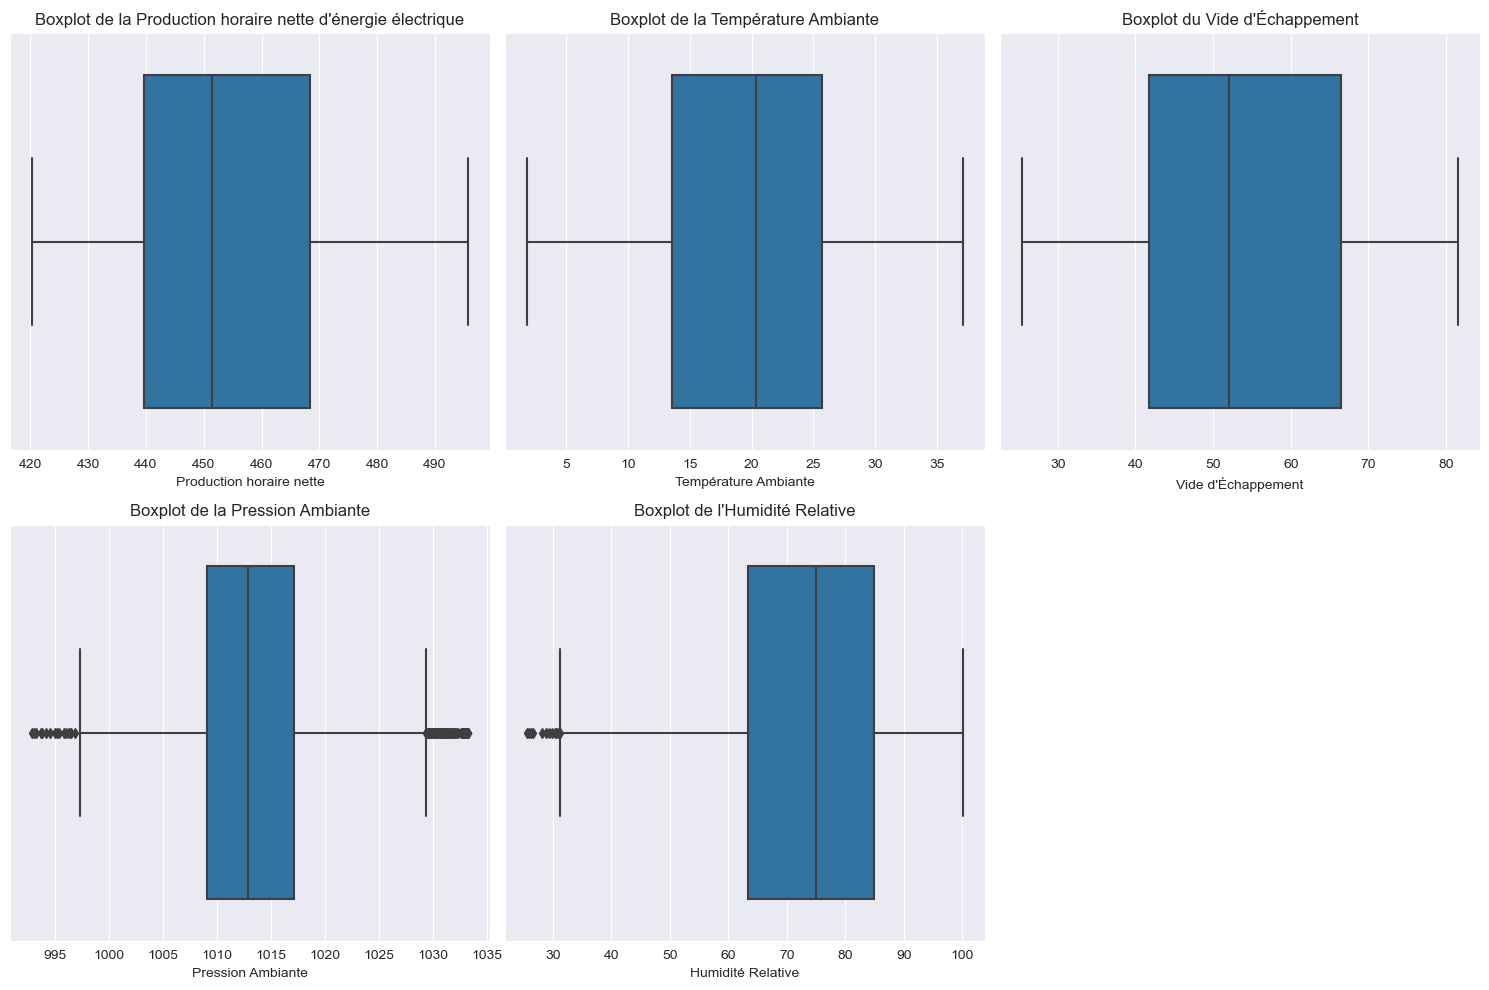

In [42]:
# Création de la figure avec une grille de 2x3
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Ajustement de la taille si nécessaire

# Ajuster l'espacement pour éviter le chevauchement
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Boxplot pour la Production horaire nette d'énergie électrique
sn.boxplot(x=df['PE'], ax=axes[0, 0])
axes[0, 0].set_title("Boxplot de la Production horaire nette d'énergie électrique")
axes[0, 0].set_xlabel('Production horaire nette')

# Boxplot pour la Température Ambiante
sn.boxplot(x=df['AT'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot de la Température Ambiante')
axes[0, 1].set_xlabel('Température Ambiante')

# Boxplot pour le Vide d'Échappement
sn.boxplot(x=df['V'], ax=axes[0, 2])
axes[0, 2].set_title("Boxplot du Vide d'Échappement")
axes[0, 2].set_xlabel("Vide d'Échappement")

# Boxplot pour la Pression Ambiante
sn.boxplot(x=df['AP'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot de la Pression Ambiante')
axes[1, 0].set_xlabel('Pression Ambiante')

# Boxplot pour l'Humidité Relative
sn.boxplot(x=df['RH'], ax=axes[1, 1])
axes[1, 1].set_title("Boxplot de l'Humidité Relative")
axes[1, 1].set_xlabel('Humidité Relative')

# Supprimer le sous-graphique vide (en bas à droite)
fig.delaxes(axes[1][2])

# Affichage des graphiques
plt.tight_layout()
plt.show()


In [43]:
# Liste des colonnes à nettoyer
colonnes = ['AP', 'RH']

# Boucle pour nettoyer les valeurs aberrantes de chaque colonne
for colonne in colonnes:
    # Calcul des quartiles Q1 (25e percentile) et Q3 (75e percentile)
    Q1 = df[colonne].quantile(0.25)
    Q3 = df[colonne].quantile(0.75)

    # Calculer l'intervalle interquartile (IQR)
    IQR = Q3 - Q1

    # Calculer les limites inférieure et supérieure pour détecter les valeurs aberrantes
    borne_inf = Q1 - 1.5 * IQR
    borne_sup = Q3 + 1.5 * IQR

    # Identifier les valeurs aberrantes
    outliers = df[(df[colonne] < borne_inf) | (df[colonne] > borne_sup)]

    # Supprimer les valeurs aberrantes identifiées avec la méthode des quartiles
    df = df.drop(outliers.index)

    # Afficher les informations sur les données mises à jour
    print("Nombre de lignes après suppression des valeurs aberrantes pour la colonne", colonne, ":", len(df))

Nombre de lignes après suppression des valeurs aberrantes pour la colonne AP : 9436
Nombre de lignes après suppression des valeurs aberrantes pour la colonne RH : 9425


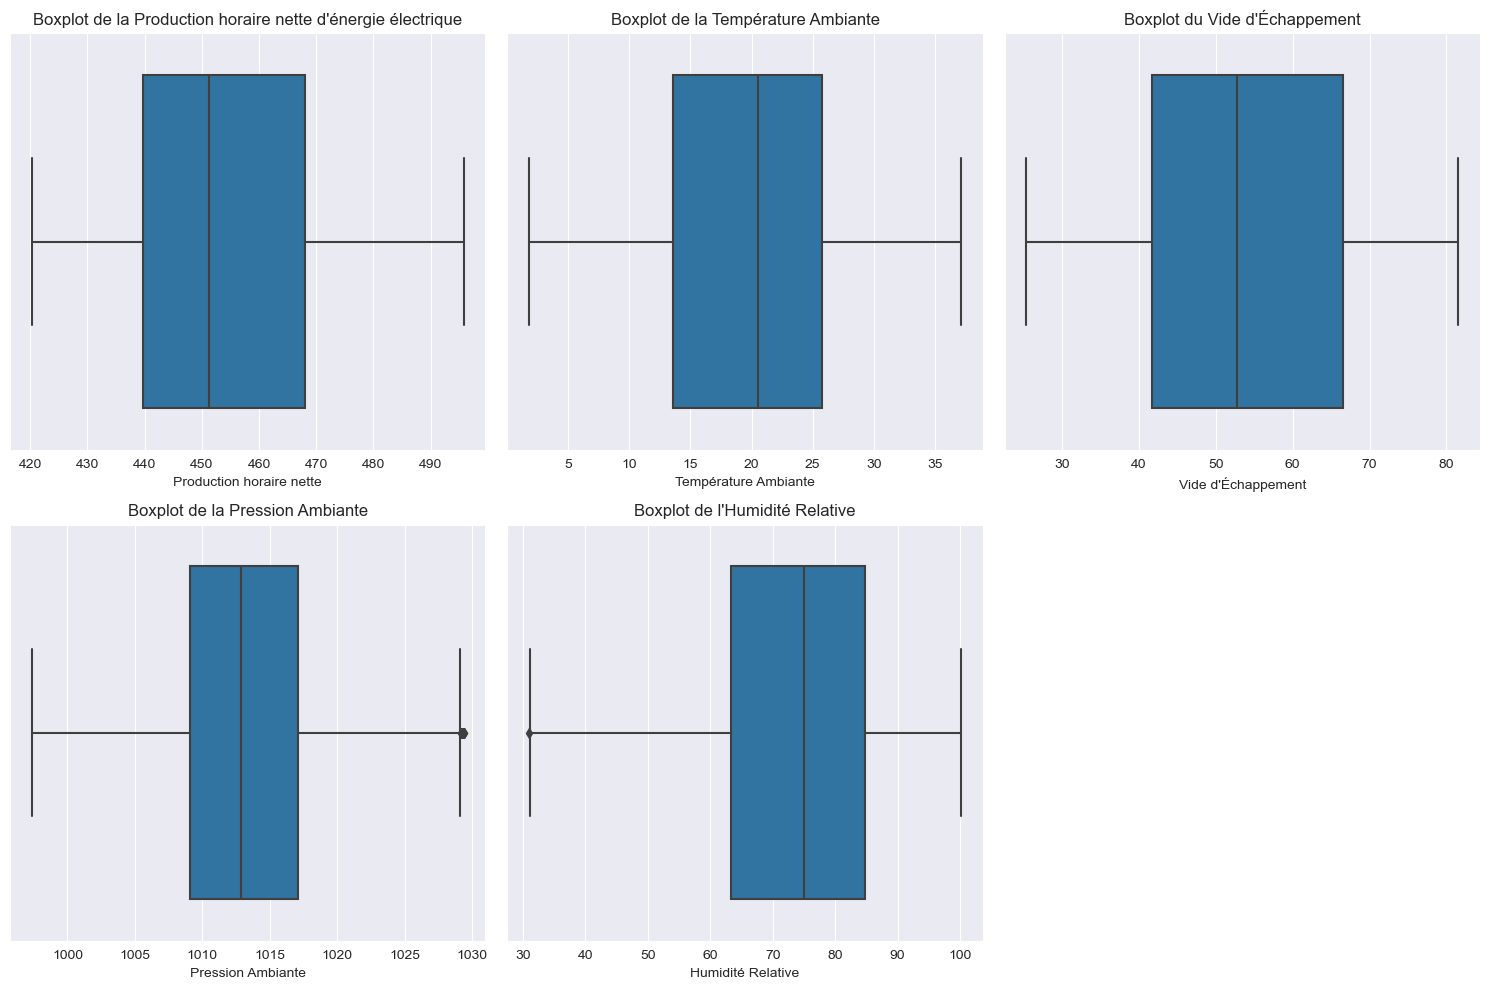

In [44]:
# Création de la figure avec une grille de 2x3
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Ajustement de la taille si nécessaire

# Ajustement l'espacement pour éviter le chevauchement
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Boxplot pour la Production horaire nette d'énergie électrique
sn.boxplot(x=df['PE'], ax=axes[0, 0])
axes[0, 0].set_title("Boxplot de la Production horaire nette d'énergie électrique")
axes[0, 0].set_xlabel('Production horaire nette')

# Boxplot pour la Température Ambiante
sn.boxplot(x=df['AT'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot de la Température Ambiante')
axes[0, 1].set_xlabel('Température Ambiante')

# Boxplot pour le Vide d'Échappement
sn.boxplot(x=df['V'], ax=axes[0, 2])
axes[0, 2].set_title("Boxplot du Vide d'Échappement")
axes[0, 2].set_xlabel("Vide d'Échappement")

# Boxplot pour la Pression Ambiante
sn.boxplot(x=df['AP'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot de la Pression Ambiante')
axes[1, 0].set_xlabel('Pression Ambiante')

# Boxplot pour l'Humidité Relative
sn.boxplot(x=df['RH'], ax=axes[1, 1])
axes[1, 1].set_title("Boxplot de l'Humidité Relative")
axes[1, 1].set_xlabel('Humidité Relative')

# Supprimer le sous-graphique vide (en bas à droite)
fig.delaxes(axes[1][2])

# Affichage des graphiques
plt.tight_layout()
plt.show()


In [45]:
#Connaitre les dimensions de notre jeu de données
df.shape

(9425, 5)

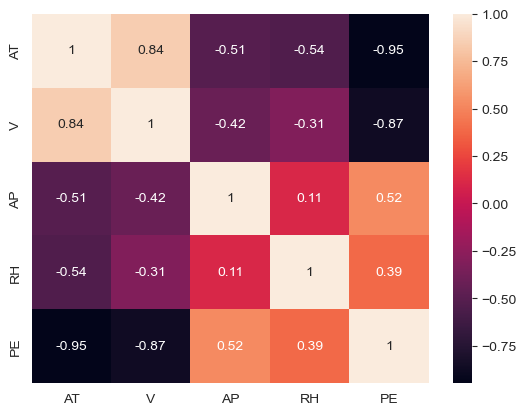

In [46]:
matrix_corr=df.corr()
#Visualisation la matrix de correlation
sn.heatmap(matrix_corr, annot=True)
plt.show()

In [47]:
# Division des données en ensembles d'entraînement
Y = df['PE']
X = df.drop('PE', axis=1)

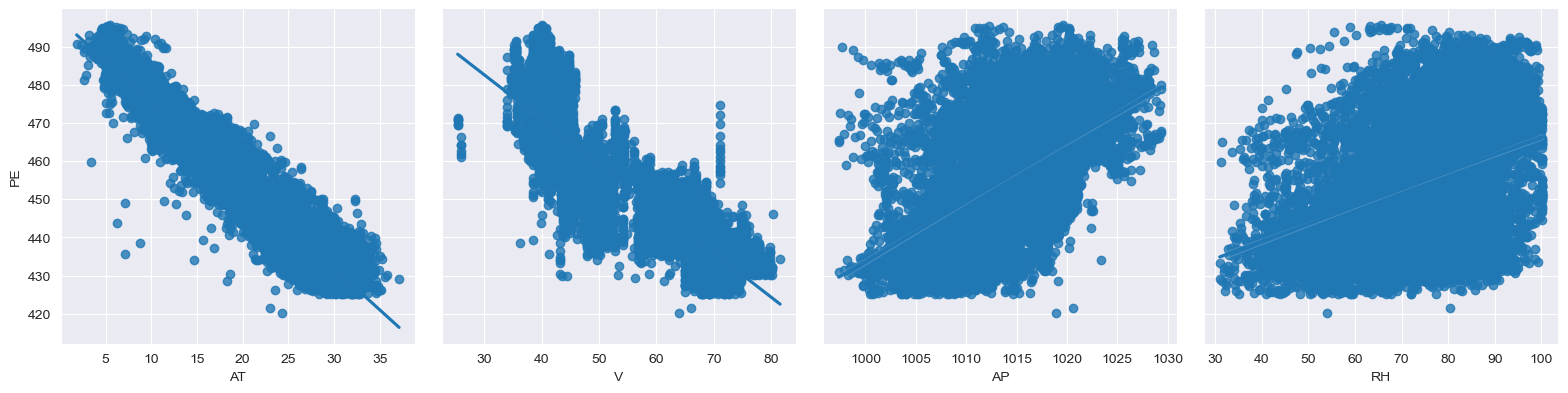

In [48]:

grid = sn.PairGrid(df, x_vars=X.columns, y_vars=Y.name, height=4)
grid = grid.map(sn.regplot)
plt.show()    

#Verification PCA

In [49]:
# Standardiser les données
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [50]:
# components pour le nombre d'axe d'analyse (composant principal)
model_pca = PCA(n_components=4)
axesprincipales = model_pca.fit_transform(scaled_X)
axesprincipales

array([[-1.8169843 ,  1.08798475,  0.62318409,  0.33612746],
       [ 0.6037062 ,  0.24632033, -0.11631761, -0.19406289],
       [ 2.18900562, -1.01220569,  1.32098106, -0.23332833],
       ...,
       [-1.01337802,  0.08792528,  0.31441927, -0.22828908],
       [-0.88056535,  0.55627297, -1.49529493, -0.04309975],
       [ 0.33515849, -0.02079315,  0.26236518, -0.48146507]])

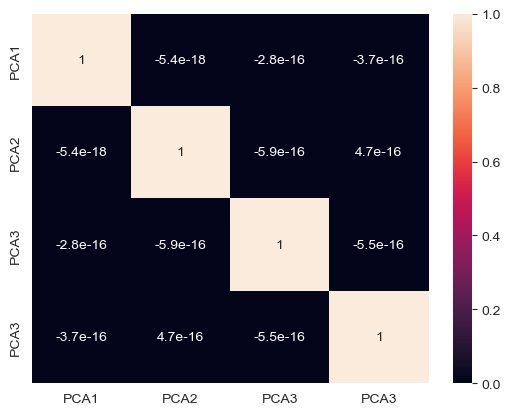

In [51]:
matrix_corr= pd.DataFrame(axesprincipales, columns=['PCA1', 'PCA2','PCA3','PCA3']).corr()
#Visualisation la matrix de correlation
sn.heatmap(matrix_corr, annot=True)
plt.show()

In [52]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(axesprincipales, Y, test_size=0.2, random_state=1)

In [53]:
# Définition des stratégies de baseline
strategies = ["constant", "quantile", "mean", "median"]
baseline_args = [{"strategy": s} for s in strategies]
baseline_args[0]['constant'] = 50  # Exemple de valeur constante
baseline_args[1]['quantile'] = 0.75  # Utilisation du 75e quantile

# Définition de la fonction regression_metrics
def regression_metrics(y_pred, y_test):
    #Calcul de l'erreur
    e=y_pred-y_test
    
    # calcule de l'erreur quadratique
    se = (e) ** 2
    # Calcul du Mean Absolute Error (MAE)
    mae = np.mean(np.abs(e))

    # Calcul du Mean Squared Error (MSE)
    mse = np.mean(se)

    # Calcul du Median Absolute Error (MeAE)
    meae = np.median(np.abs(e))

    # Calcul du Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # Calcul du coefficient de détermination (R^2)
    ss_res = np.sum(se)
    ss_tot = np.sum((np.mean(y_test)-y_test) ** 2)
    r_squared = 1 - (ss_res / ss_tot)

    # Affichage des résultats
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Median Absolute Error (MeAE): {meae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Coefficient of Determination (R^2): {r_squared}")

# Fonction pour créer et évaluer les DummyRegressors
def dummy_regressors(**args):
    baseline = DummyRegressor(**args)
    baseline.fit(X_train, y_train)
    y_pred = baseline.predict(X_test)
    print(f"strategie: {args['strategy']}")
    regression_metrics(y_pred,y_test)

# Appliquer les stratégies de DummyRegressor
[dummy_regressors(**strat) for strat in baseline_args]

strategie: constant
Mean Absolute Error (MAE): 404.0743607427048
Mean Squared Error (MSE): 163561.7649885944
Median Absolute Error (MeAE): 401.88
Root Mean Squared Error (RMSE): 404.4277005703175
Coefficient of Determination (R^2): -571.5429403601029
strategie: quantile
Mean Absolute Error (MAE): 18.646610079575606
Mean Squared Error (MSE): 489.46985517241507
Median Absolute Error (MeAE): 18.689999999999998
Root Mean Squared Error (RMSE): 22.12396562943486
Coefficient of Determination (R^2): -0.7133742113726298
strategie: mean
Mean Absolute Error (MAE): 14.65538946027904
Mean Squared Error (MSE): 285.69008950905874
Median Absolute Error (MeAE): 14.076851458885926
Root Mean Squared Error (RMSE): 16.902369346013558
Coefficient of Determination (R^2): -4.939351604504871e-05
strategie: median
Mean Absolute Error (MAE): 14.558238726790437
Mean Squared Error (MSE): 294.70216244031803
Median Absolute Error (MeAE): 13.590000000000032
Root Mean Squared Error (RMSE): 17.166891461191163
Coefficie

[None, None, None, None]

In [54]:

# Définition du pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalisation des données
    ('pca', PCA(n_components=4)),  # Application de PCA
    ('regression', LinearRegression())  # Modèle de régression
])

# Stratégies de validation croisée avec K-Fold, ShuffleSplit, Leave-One-Out
kf = KFold(n_splits=5, shuffle=True, random_state=42)
ss = ShuffleSplit(n_splits=10, test_size=0.25, random_state=42)
loo = LeaveOneOut()

# Évaluation avec K-Fold
cv_scores = cross_val_score(pipeline, X, Y, cv=kf, scoring='r2')

# Évaluation avec ShuffleSplit
ss_scores = cross_val_score(pipeline, X, Y, cv=ss, scoring='r2')

# Évaluation avec  Leave-One-Out
loo_scores = cross_val_score(pipeline, X, Y, cv=loo, scoring='neg_mean_squared_error')


# Affichage des scores R²
print(f"Moyenne des scores R² avec K-Fold: {cv_scores.mean():.4f}")
print(f"Moyenne des scores R² avec ShuffleSplit: {ss_scores.mean():.4f}")
print(f"Moyenne des scores Mean avec Leave-One-Out: {-loo_scores.mean():.4f}")


Moyenne des scores R² avec K-Fold: 0.9276
Moyenne des scores R² avec ShuffleSplit: 0.9269
Moyenne des scores Mean avec Leave-One-Out: 20.8885


In [55]:

def performance_indicator(y_pred, y_test, model):
  
    #Calcule de l'erreur
    e=y_pred-y_test

    # calcule de l'erreur quadratique
    se = (e) ** 2
    # Calcul du Mean Absolute Error (MAE)
    mae = np.mean(np.abs(e))

    # Calcul du Mean Squared Error (MSE)
    mse = np.mean(se)

    # Calcul du Median Absolute Error (MeAE)
    meae = np.median(np.abs(e))

    # Calcul du Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # Calcul du coefficient de détermination (R^2)
    ss_res = np.sum(se)
    ss_tot = np.sum((np.mean(y_test)-y_test) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    # Affichage des résultats
    print(f" \n  {model} \n ")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Median Absolute Error (MeAE): {meae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Coefficient of Determination (R^2): {r_squared}")


def residual_plot(y_true, y_predicted, model_name):
    plt.plot(y_predicted, y_true - y_predicted, "*")
    plt.plot(y_predicted, np.zeros_like(y_predicted), "-")
    plt.legend(["Data", "Perfection"])
    plt.title("Residual Plot of " + model_name)
    plt.xlabel("Predicted Value")
    plt.ylabel("Residual")
    plt.show()
    

In [56]:
# Régression Linéaire MMultiple
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
performance_indicator(y_test, y_pred_lr, 'Linear Regression')

# Régression Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
performance_indicator(y_test, y_pred_ridge, 'Ridge Regression')

# Régression Lasso 
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
performance_indicator(y_test, y_pred_lasso, 'Lasso Regression')


 
  Linear Regression 
 
Mean Absolute Error (MAE): 3.6409966758862935
Mean Squared Error (MSE): 20.587948649479742
Median Absolute Error (MeAE): 3.194891495278739
Root Mean Squared Error (RMSE): 4.53739447805453
Coefficient of Determination (R^2): 0.9234051431561247
 
  Ridge Regression 
 
Mean Absolute Error (MAE): 3.6411521327401952
Mean Squared Error (MSE): 20.588441501705905
Median Absolute Error (MeAE): 3.195250843918302
Root Mean Squared Error (RMSE): 4.537448787777764
Coefficient of Determination (R^2): 0.9233855694878101
 
  Lasso Regression 
 
Mean Absolute Error (MAE): 4.667747066935965
Mean Squared Error (MSE): 34.68295360755398
Median Absolute Error (MeAE): 3.9823707265790063
Root Mean Squared Error (RMSE): 5.889223514823833
Coefficient of Determination (R^2): 0.8473901064833216


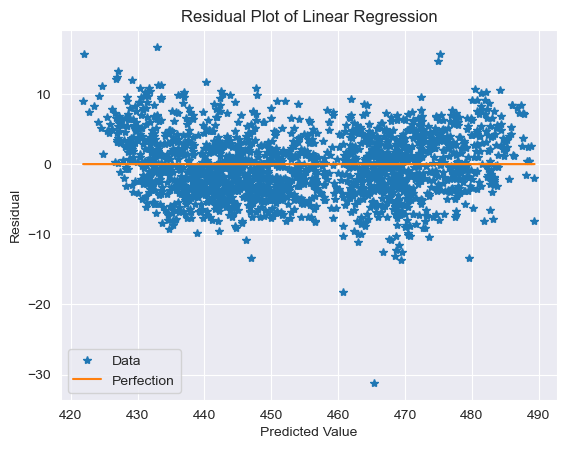

In [57]:
residual_plot(y_test,y_pred_lr,'Linear Regression')

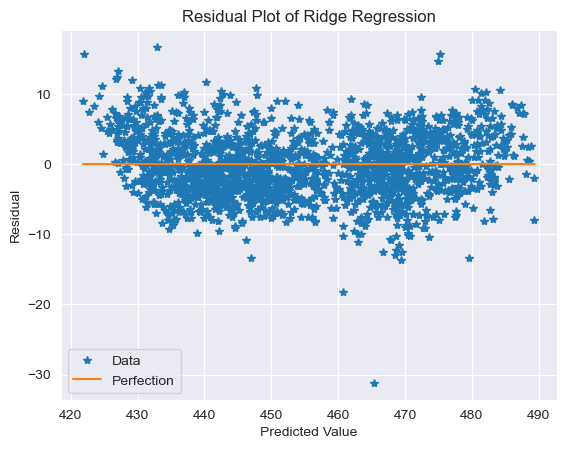

In [58]:
residual_plot(y_test,y_pred_ridge,'Ridge Regression')

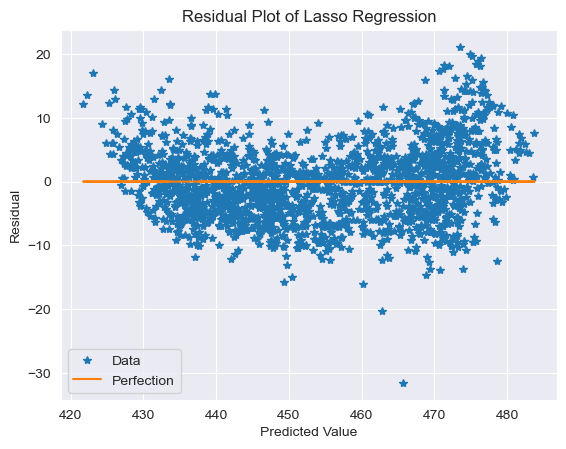

In [59]:
residual_plot(y_test,y_pred_lasso,'Lasso Regression')